In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [113]:
df = pd.read_csv('./src/data/original_csv.csv')

# fill missing values with mean column values
df.fillna(df.mean(), inplace=True)

#replace value in class column
df['class'] = df['class'].replace(['class1', 'class2'], [0, 1])
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [114]:
X = df.drop('class', axis=1)
y = df['class']
print(X.head())

   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion   Single Epithelial Cell Size Bare Nuclei  \
0                  1                             2           1   
1                  5                             7          10   
2                  1                             2           2   
3                  1                             3           4   
4                  3                             2           1   

   Bland Chromatin  Normal Nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3     

In [115]:
#normalize data
X = (X - X.mean()) / X.std()
y = y

#replace NaN with 0
X = X.fillna(0)

print(X.head())
print(y.head())

    Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  \
0                     -0.549168            0        -0.179534   
1                      1.708882            0        -0.179534   
2                     -0.549168            0        -0.179534   
3                     -0.097558            0        -0.179534   
4                     -0.549168            0        -0.179534   

   Clump Thickness  Marginal Adhesion   Mitoses  Normal Nucleoli  \
0         0.206788          -0.632794 -0.343666        -0.611387   
1         0.206788           0.768071 -0.343666        -0.283909   
2        -0.503505          -0.632794 -0.343666        -0.611387   
3         0.561934          -0.632794 -0.343666         1.353485   
4        -0.148359           0.067638 -0.343666        -0.611387   

   Uniformity of Cell Shape  Uniformity of Cell Size  
0                 -0.742767                -0.699494  
1                  0.266684                 0.283642  
2                 -0.742767        

In [116]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())

      Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  \
82                      -0.549168            0        -0.179534   
51                      -0.549168            0        -0.179534   
220                     -0.549168            0        -0.179534   
559                     -0.549168            0        -0.589645   
544                     -0.549168            0        -0.589645   

     Clump Thickness  Marginal Adhesion   Mitoses  Normal Nucleoli  \
82          0.206788          -0.632794 -0.343666        -0.611387   
51          0.206788           0.417854 -0.343666         0.371049   
220        -1.213798          -0.282578 -0.343666        -0.611387   
559         0.206788          -0.632794 -0.343666        -0.611387   
544        -0.858651          -0.282578 -0.343666        -0.611387   

     Uniformity of Cell Shape  Uniformity of Cell Size  
82                  -0.742767                -0.371782  
51                  -0.069800                -0.044070  
220  

In [117]:
import warnings
warnings.filterwarnings('ignore')

#knn model
model = KNeighborsClassifier(n_neighbors=2, metric='euclidean', weights='distance')
#train model
model.fit(X_train, y_train)
#predict
y_pred = model.predict(X_test)
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
#f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("kNN accuracy score: ", accuracy)
print("kNN f1 score: ", f1)

kNN accuracy score:  0.9071428571428571
kNN f1 score:  0.9040839116216002


In [118]:

#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        95
           1       0.94      0.76      0.84        45

    accuracy                           0.91       140
   macro avg       0.92      0.87      0.89       140
weighted avg       0.91      0.91      0.90       140



In [119]:
#actual vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25)

,Actual,Predicted
158,0,0
499,0,0
396,0,0
155,1,1
321,0,0
212,0,0
234,0,0
289,1,1
300,1,1
356,1,0


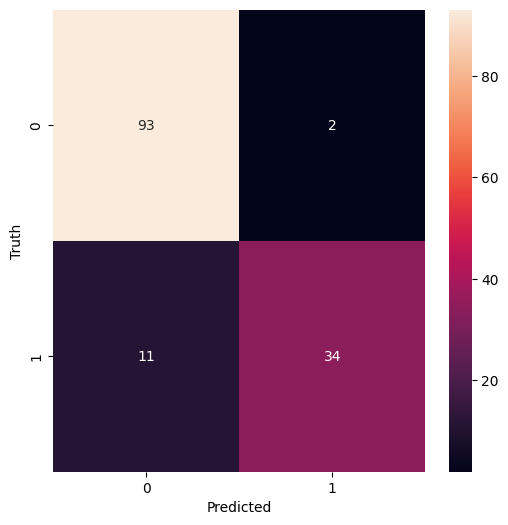

In [120]:
#plot confusion matrix
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

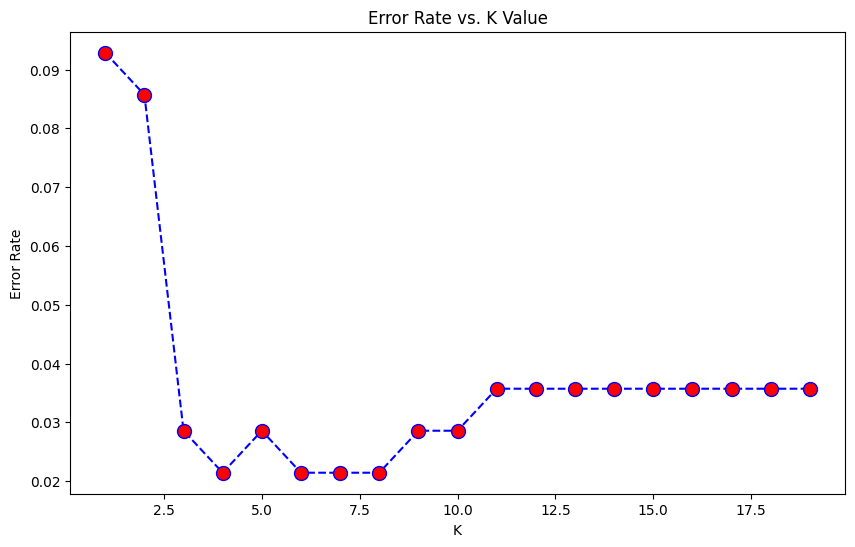

In [121]:
#Choose a K Value

error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

#let's plot a line graph to see the error rate
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [122]:
#compare k == 2 and k == 5
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


WITH K=1


[[94  1]
 [11 34]]


              precision    recall  f1-score   support

           0       0.90      0.99      0.94        95
           1       0.97      0.76      0.85        45

    accuracy                           0.91       140
   macro avg       0.93      0.87      0.90       140
weighted avg       0.92      0.91      0.91       140

WITH K=5


[[92  3]
 [ 1 44]]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98        95
           1       0.94      0.98      0.96        45

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       ' Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'class'],
      dtype='object')
Uniformity of Cell Size     0
Uniformity of Cell Shape    0
dtype: int64
kNN accuracy score:  0.9428571428571428
kNN f1 score:  0.9428571428571428


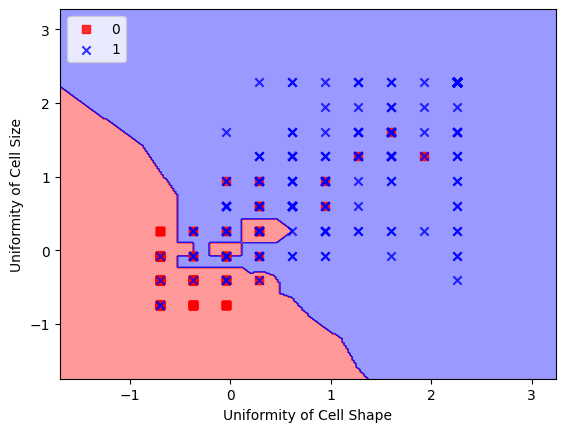

In [189]:
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('./data/original_csv.csv')
print(df.columns)

#choose 3rd and 5th column
# X = df.iloc[:, [2, 4]].values
# y = df.iloc[:, -1].values
X = df.drop(['Clump Thickness', 'Marginal Adhesion',
       ' Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'class'], axis=1)
y = df['class']

#conver categorical data to numerical data
from posixpath import split
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

#check Nan value


#standardize data
sc = StandardScaler()
X = sc.fit_transform(X)

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#knn model
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
#train model
model.fit(X_train, y_train)
#predict
y_pred = model.predict(X_test)
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
#f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("kNN accuracy score: ", accuracy)
print("kNN f1 score: ", f1)


# plot classifier boundaries
from matplotlib.colors import ListedColormap


markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = model.predict(np.array([xx.ravel(), yy.ravel()]).T)
#put result into color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
#plt.pcolormesh(xx, yy, Z, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Uniformity of Cell Shape')
plt.ylabel('Uniformity of Cell Size')
#plot training data
for idx, cl in enumerate(np.unique(y)):
       plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
plt.legend(loc='upper left')
plt.show()

In [193]:
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('./data/original_csv.csv')
print(df.columns)

#choose 3rd and 5th column
# X = df.iloc[:, [2, 4]].values
# y = df.iloc[:, -1].values
X = df.drop(['class','Bare Nuclei' ], axis=1)
y = df['class']

#conver categorical data to numerical data
from posixpath import split
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

#df['Bare Nuclei'] = labelencoder.fit_transform(df['Bare Nuclei'])
#check Nan value
#standardize data
sc = StandardScaler()
X = sc.fit_transform(X)
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

#knn model
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
#train model
model.fit(X_train, y_train)
#predict
y_pred = model.predict(X_test)
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
#f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("kNN accuracy score: ", accuracy)
print("kNN f1 score: ", f1)

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       ' Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'class'],
      dtype='object')
[[ 0.20693572 -0.37204831 -0.74329904 ... -0.17966213 -0.61182504
  -0.34391178]
 [ 0.20693572 -0.04410156 -0.06984988 ... -0.17966213  0.37131451
  -0.34391178]
 [-1.2146669  -0.69999505 -0.74329904 ... -0.17966213 -0.61182504
  -0.34391178]
 ...
 [ 1.27313768  0.28384518  1.27704844 ... -0.17966213  2.00988041
   0.23956962]
 [ 1.983939    1.59563215  2.28722218 ...  0.64114721 -0.61182504
  -0.34391178]
 [-0.14846494 -0.69999505 -0.40657446 ... -0.17966213 -0.61182504
  -0.34391178]]
kNN accuracy score:  0.9714285714285714
kNN f1 score:  0.9715871547508921
